In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/yelp-data/yelp.csv


In [2]:
data = pd.read_csv('/kaggle/input/yelp-data/yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,26-01-2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,27-07-2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,14-06-2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,27-05-2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,05-01-2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
dataset = data[['text', 'stars']]
dataset.head()

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5


In [5]:
x = dataset.text
y = dataset.stars

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
trainx, testx, trainy, testy = train_test_split(x, y)

In [8]:
import tensorflow as tf
from keras.layers import *
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import Sequential

Using TensorFlow backend.


In [9]:
vocab_size = 1000
tokeniser = Tokenizer(num_words = vocab_size)

In [10]:
tokeniser.fit_on_texts(trainx)

In [11]:
seqtrain = tokeniser.texts_to_sequences(trainx)
seqtest = tokeniser.texts_to_sequences(testx)

In [12]:
paddedtrain = pad_sequences(seqtrain, maxlen=100)
paddedtest = pad_sequences(seqtest, maxlen=100)

In [13]:
embed_dim = 64 # dimension used to locate each words

In [14]:
y.unique()

array([5, 4, 2, 3, 1])

In [15]:
model = Sequential([
    Embedding(vocab_size, embed_dim),
    LSTM(64, dropout=0.7),
    Dense(5, activation='softmax')
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['acc'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 97,349
Trainable params: 97,349
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(paddedtrain, trainy, validation_split=0.2, epochs=5, batch_size=128)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 6000 samples, validate on 1500 samples
Epoch 1/5
6000/6000 [==============================] - 6s 1ms/step - loss: 31.2822 - acc: 0.7013 - val_loss: 32.4030 - val_acc: 1.0000
Epoch 2/5
6000/6000 [==============================] - 5s 785us/step - loss: 32.8035 - acc: 1.0000 - val_loss: 32.7661 - val_acc: 1.0000
Epoch 3/5
6000/6000 [==============================] - 5s 792us/step - loss: 32.8704 - acc: 1.0000 - val_loss: 32.7321 - val_acc: 1.0000
Epoch 4/5
6000/6000 [==============================] - 5s 804us/step - loss: 32.8432 - acc: 1.0000 - val_loss: 32.7118 - val_acc: 1.0000
Epoch 5/5
6000/6000 [==============================] - 5s 809us/step - loss: 32.8241 - acc: 1.0000 - val_loss: 32.6969 - val_acc: 1.0000


In [19]:
import matplotlib.pyplot as plt

In [20]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

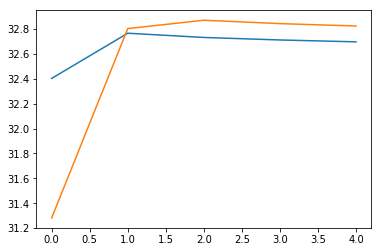

In [21]:
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

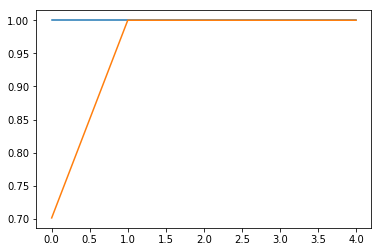

In [22]:
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

In [23]:
model.evaluate(paddedtest, testy)

2500/2500 [==============================] - 2s 680us/step


[32.388805322265625, 1.0]

In [24]:
da

NameError: name 'da' is not defined